In [45]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os

from PIL import Image
from keras.utils.np_utils import to_categorical

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator

import json

In [24]:
TRAIN_DIR = 'data/fingers/train'
TEST_DIR = 'data/fingers/test'

In [25]:
IMAGE_SIZE = (128, 128)
input = (128, 128, 1)
kernel_size = (3, 3)
batch_size = 16

In [26]:
def load_images_and_labels(directory):
    images = []
    labels = []
    for file in os.listdir(directory):
        file_path = os.path.join(directory, file)
        img = Image.open(file_path).resize(IMAGE_SIZE) #resize the image
        images.append(np.array(img))
        label_part = file.split('_')[1] #extract label from the filename
        label = int(label_part[0])       
        labels.append(label)
    return np.array(images), np.array(labels)

train_images, train_labels = load_images_and_labels(TRAIN_DIR)
test_images, test_labels = load_images_and_labels(TEST_DIR)

print(train_labels[0])
print(f"Train images: {train_images.shape}, Train labels: {train_labels.shape}")
print(f"Test images: {test_images.shape}, Test labels: {test_labels.shape}")

0
Train images: (18000, 128, 128), Train labels: (18000,)
Test images: (3600, 128, 128), Test labels: (3600,)


(128, 128)


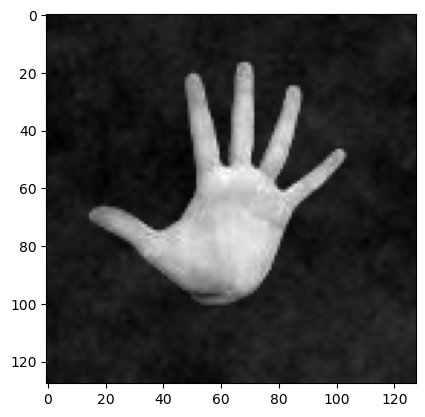

In [27]:
single_img = train_images[4]
print(single_img.shape)
plt.imshow(single_img, cmap='gray')

(128, 128)


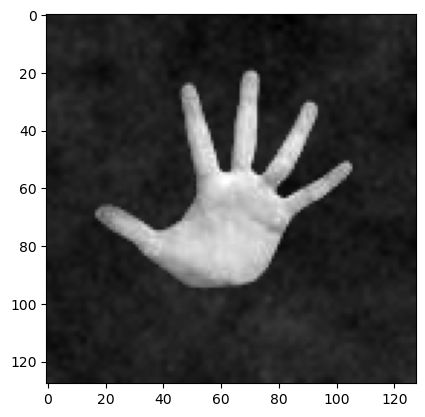

In [28]:
single_img2 = test_images[4]
print(single_img2.shape)
plt.imshow(single_img2, cmap='gray')

In [29]:
train_images = train_images / 255
test_images = test_images / 255

In [30]:
print(train_images.shape, test_images.shape)

(18000, 128, 128) (3600, 128, 128)


In [31]:
train_images = train_images.reshape(18000, 128, 128, 1)
test_images = test_images.reshape(3600, 128, 128, 1)

In [32]:
print(train_images.shape, test_images.shape)

(18000, 128, 128, 1) (3600, 128, 128, 1)


In [33]:
train_labels = to_categorical(train_labels,6)
test_labels = to_categorical(test_labels, 6)

In [34]:
print ("number of training examples = " + str(train_images.shape[0]))
print ("number of test examples = " + str(test_images.shape[0]))
print ("X_train shape: " + str(train_images.shape))
print ("Y_train shape: " + str(train_labels.shape))
print ("X_test shape: " + str(test_images.shape))
print ("Y_test shape: " + str(test_labels.shape))

number of training examples = 18000
number of test examples = 3600
X_train shape: (18000, 128, 128, 1)
Y_train shape: (18000, 6)
X_test shape: (3600, 128, 128, 1)
Y_test shape: (3600, 6)


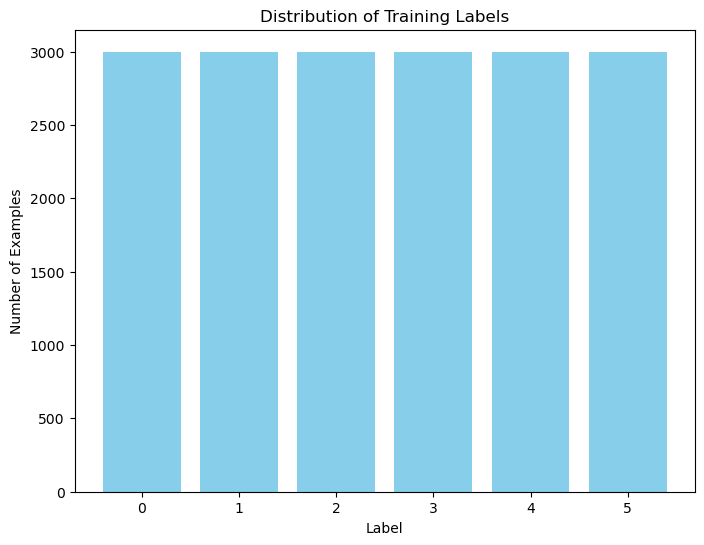

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming Y_train is a one-hot encoded array
# Convert one-hot encoding to label indices
label_indices = np.argmax(train_labels, axis=1)

# Count occurrences of each label
label_counts = np.bincount(label_indices)

# Generate the bar plot
plt.figure(figsize=(8, 6))
plt.bar(range(len(label_counts)), label_counts, color='skyblue')
plt.title('Distribution of Training Labels')
plt.xlabel('Label')
plt.ylabel('Number of Examples')
plt.xticks(range(len(label_counts)))
plt.show()

In [36]:
img_generator = keras.preprocessing.image.ImageDataGenerator(
                    rotation_range=45,
                    zoom_range=0.2,
                    width_shift_range=0.05,
                    height_shift_range=0.05,
                    shear_range = 0.1,
                    horizontal_flip=False,
                    fill_mode="nearest",
                )

(128, 128, 1)


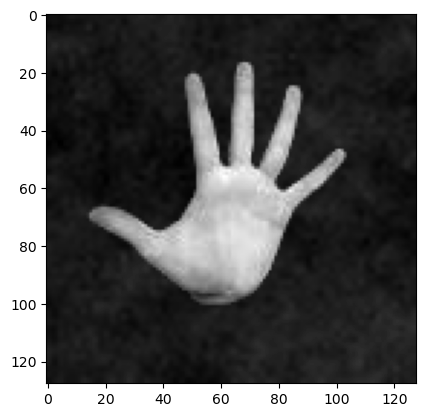

In [37]:
single_img = train_images[4]
print(single_img.shape)
plt.imshow(single_img, cmap='gray')

# Making the model

In [38]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=kernel_size, padding='same', activation='relu', input_shape=input))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(filters=64, kernel_size=kernel_size, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))

model.add(Flatten())  # You can replace with GlobalAveragePooling2D()
model.add(Dense(units=64, activation='relu'))  # Smaller dense layer
model.add(Dense(units=6, activation='softmax'))  # Output layer

model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 128, 128, 32)      320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 64, 64, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 65536)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4194368   
_________________________________________________________________
dense_3 (Dense)              (None, 6)                

In [39]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x= img_generator.flow(train_images,train_labels,batch_size=batch_size),
                    steps_per_epoch= train_images.shape[0] // batch_size,
                    validation_data= img_generator.flow(test_images,test_labels, batch_size=batch_size),
                    validation_steps= test_images.shape[0] // batch_size,
                    epochs=5,
                    verbose=1,
                    )

Epoch 1/5
1125/1125 [==============================] - 25s 22ms/step - loss: 0.3569 - accuracy: 0.8672 - val_loss: 0.1074 - val_accuracy: 0.9708
Epoch 2/5
1125/1125 [==============================] - 24s 22ms/step - loss: 0.0922 - accuracy: 0.9706 - val_loss: 0.0937 - val_accuracy: 0.9661
Epoch 3/5
1125/1125 [==============================] - 26s 23ms/step - loss: 0.0532 - accuracy: 0.9832 - val_loss: 0.0482 - val_accuracy: 0.9842
Epoch 4/5
1125/1125 [==============================] - 26s 23ms/step - loss: 0.0461 - accuracy: 0.9846 - val_loss: 0.0348 - val_accuracy: 0.9878
Epoch 5/5
1125/1125 [==============================] - 26s 24ms/step - loss: 0.0322 - accuracy: 0.9906 - val_loss: 0.0407 - val_accuracy: 0.9861


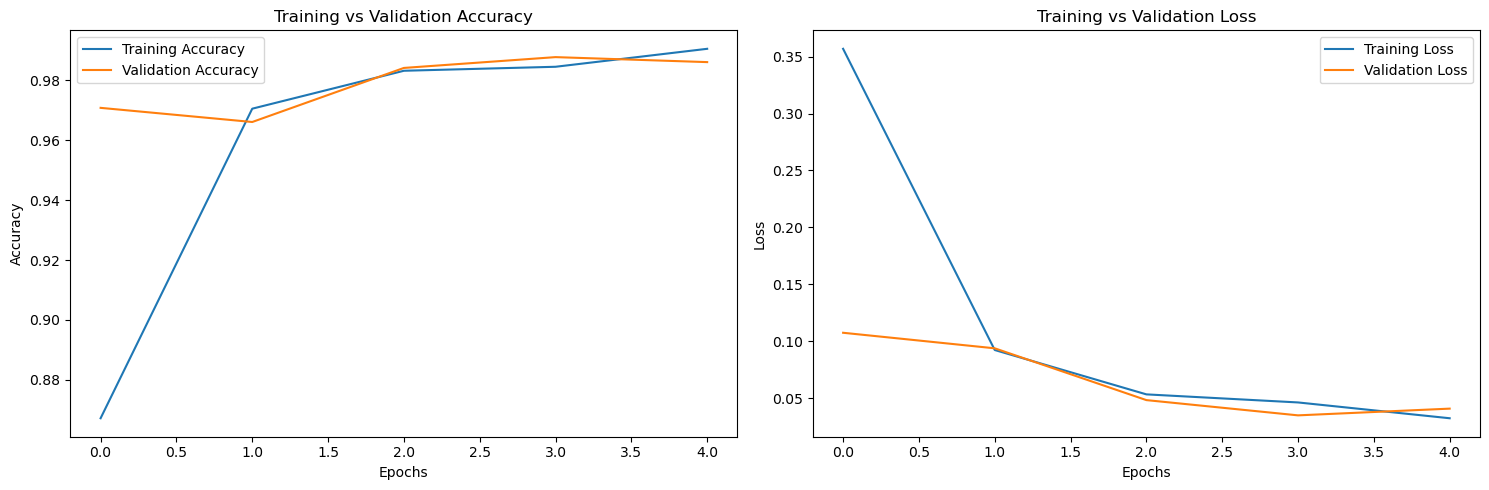

In [40]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

train_loss = history.history['loss']
val_loss = history.history['val_loss']

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

ax[0].plot(train_acc, label='Training Accuracy')
ax[0].plot(val_acc, label='Validation Accuracy')
ax[0].set_title('Training vs Validation Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend()

ax[1].plot(train_loss, label='Training Loss')
ax[1].plot(val_loss, label='Validation Loss')
ax[1].set_title('Training vs Validation Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend()

plt.tight_layout()
plt.show()

In [41]:
model.save("fingers_grayscale.model")

INFO:tensorflow:Assets written to: fingers_grayscale.model\assets


In [43]:
# serialize model to JSON
model_json = model.to_json()
with open("finger_wp.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model_wp.h5")
print("Saved model to disk")

Saved model to disk


In [44]:
pred = model.evaluate(test_images,
                      test_labels,
                    batch_size = 128)

print("Accuracy of model on test data is: ", pred[1]*100)

29/29 [==============================] - 1s 27ms/step - loss: 0.0118 - accuracy: 0.9967
Accuracy of model on test data is:  99.6666669845581


# WEBCAM

In [49]:
import cv2

In [51]:
from keras.models import load_model

In [63]:
from keras.models import load_model
import cv2
import numpy as np
from PIL import Image

# Load the saved model
model_ = load_model('fingers_grayscale.model')
video = cv2.VideoCapture(0)

if not video.isOpened():
    raise ValueError("No camera found.")

while True:
    ret, frame = video.read()
    if ret:
        # Convert the frame to grayscale using OpenCV
        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # Convert the grayscale frame into a PIL Image
        im = Image.fromarray(gray_frame, 'L')

        # Resize to 128x128 (model's input size)
        im = im.resize((128, 128))

        # Convert the image to a numpy array
        img_array = np.array(im)

        # Reshape to 4D tensor: (1, height, width, channels)
        img_array = np.expand_dims(img_array, axis=0)
        img_array = np.expand_dims(img_array, axis=-1)  # Add channel dimension

        # Make a prediction using the model
        prediction = int(model_.predict(img_array)[0][0])

        # Display the original frame
        cv2.imshow("Capturing", frame)

        # Exit loop when 'q' is pressed
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        raise ValueError("Failed to capture frame.")

# Release resources
video.release()
cv2.destroyAllWindows()
